# Aula 1 - Balanceamento de dados

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

Para falarmos um pouco sobre o que já aprendemos e introduzirmos alguns assuntos novos, vamos utilizar um dataset relacionado a crédito. As colunas desta são descritas abaixo:


1 - age - idade : (numeric)

2 - job - ocupação : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")

3 - marital - estado civil : marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)

4 - education - escolaridade: (categorical: "unknown", "secondary", "primary", "tertiary")

5 - default: has credit in default? (binary: "yes", "no")

6 - balance - balanço: average yearly balance, in euros (numeric)

7 - housing - financiamento imobiliário: has housing loan? (binary: "yes", "no")

8 - loan - empréstimo pessoal: has personal loan? (binary: "yes", "no")

9 - contact - contato: contact communication type (categorical: "unknown", "telephone", "cellular")

10 - day - data: last contact day of the month (numeric)

11 - month - mês: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration - duração: last contact duration, in seconds (numeric)

13 - campaign - campanha: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays - dias passados: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous - anterior: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome - resultado: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [11]:
# Carregar o dataset (depois de ter um conhecimento prévio dele)
df =  pd.read_csv('../datasets/bank-full.csv')

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
# Análise exporatória de dados
# nulos (missing), dados duplicados, distribuição, (tratamento de dados), dados categóricos/numéricos
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [16]:
# Definir quem são as features e quem é o target
X = df.select_dtypes(include=np.number)
y = df['Target']

In [17]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [18]:
df['Target'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

Dataset completamente desbalanceado

In [19]:
# particionar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [21]:
y_train.value_counts(normalize=True)

no     0.883931
yes    0.116069
Name: Target, dtype: float64

In [22]:
y_test.value_counts(normalize=True)

no     0.879354
yes    0.120646
Name: Target, dtype: float64

In [23]:
# Escolher um modelo. Modelo supervisionado - classificação
model = DecisionTreeClassifier() # instanciando o modelo

# Treina o modelo
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [24]:
# Avalia o modelo
y_pred = model.predict(X_test) # predição com dados de teste


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.91      0.91      7952
         yes       0.39      0.42      0.40      1091

    accuracy                           0.85      9043
   macro avg       0.65      0.66      0.66      9043
weighted avg       0.86      0.85      0.85      9043



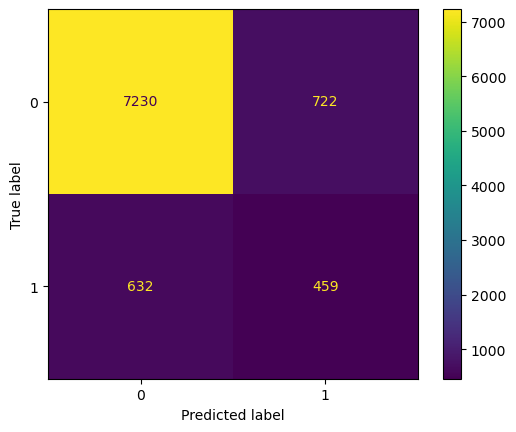

In [27]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot();

# Balanceamento dos dados

1. Oversampling: aumentar a quantidade de amostras da classe minoritãria para igualar com a majoritária
2. Undersampling: diminuir a quantidade de amostras da classe majoritária para igualar a minoritária

<img src="images/resampling.png"  style="width:800px" />


*OBSERVAÇÃO*: fazer balanceamento apenas entre as amostras de treinamento!!!

In [29]:
y_train.value_counts(normalize=True)

no     0.883931
yes    0.116069
Name: Target, dtype: float64

Biblioteca: https://imbalanced-learn.org/

In [30]:
!pip install imblearn

### 1) Oversampling
[imblearn.over_sampling.SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)  
O SMOTE (Synthetic Minority Over-sampling Technique) usa interpolação entre os dados da classe minoritária para gerar pontos aleatórios. Ele funciona selecionando exemplos próximos no espaço, desenhando uma linha entre os exemplos no espaço de recursos e criando uma nova amostra em um ponto ao longo dessa linha.

In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Shape do dataset original', Counter(y_train))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print('Shape do dataset após oversampling', Counter(y_res))

Shape do dataset original Counter({'no': 31970, 'yes': 4198})
Shape do dataset após oversampling Counter({'no': 31970, 'yes': 31970})


[imblearn.over_sampling.RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)  
O Random Oversample cria pontos aleatórios no espaço baseado nos próprios pontos da classe minoritária.

In [34]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print('Shape do dataset original', Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Shape do dataset após oversampling', Counter(y_res))

Shape do dataset original Counter({'no': 31970, 'yes': 4198})
Shape do dataset após oversampling Counter({'no': 31970, 'yes': 31970})


[imblearn.over_sampling.ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)  
O algoritmo ADAptive SYNthetic (ADASYN) é semelhante ao SMOTE, e funciona gerando amostras sintéticas para classes minoritárias com base no conjunto de dados original. Calcula a distribuição de densidade de cada amostra da classe minoritária e gera amostras sintéticas de acordo esta distribuição de densidade.

In [36]:
from imblearn.over_sampling import ADASYN
from collections import Counter

print('Shape do dataset original', Counter(y_train))

ada = ADASYN(random_state=42)
X_res_1, y_res_1 = ada.fit_resample(X_train, y_train)

print('Shape do dataset após oversampling', Counter(y_res_1))

Shape do dataset original Counter({'no': 31970, 'yes': 4198})
Shape do dataset após oversampling Counter({'yes': 32798, 'no': 31970})


<img src=https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_004.png width=900>

### 2) Undersampling

[imblearn.under_sampling.RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)  
A técnica de Random Undersampling envolve a seleção aleatória de exemplos da classe majoritária e a exclusão deles do conjunto de dados de treinamento.

In [37]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print('Shape do dataset original', Counter(y_train))

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

print('Shape do dataset após oversampling', Counter(y_res))

Shape do dataset original Counter({'no': 31970, 'yes': 4198})
Shape do dataset após oversampling Counter({'no': 4198, 'yes': 4198})


[imblearn.under_sampling.TomekLinks](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)  
O algoritmo Tomek Link encontra pontos próximos de classes diferentes e elimina aqueles da classe majoritária.

In [39]:
from imblearn.under_sampling import TomekLinks
from collections import Counter

print('Shape do dataset original', Counter(y_train))

tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)

print('Shape do dataset após oversampling', Counter(y_res))

Shape do dataset original Counter({'no': 31970, 'yes': 4198})
Shape do dataset após oversampling Counter({'no': 30501, 'yes': 4198})


### 3) Up + Downsampling

[imblearn.combine.SMOTEENN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)  
A técnica de Over-sampling com SMOTE e limpeza usando Edited Nearest Neighbor (ENN), como o próprio nome já traduz, faz uso do SMOTE para aumentar as amostras da classe minoritária. O ENN remove as amostras as quais possuem labels diferentes da classe majoritária dos k vizinhos mais próximos.

In [41]:
from imblearn.combine import SMOTEENN
from collections import Counter

print('Shape do dataset original', Counter(y_train))

smn = SMOTEENN(random_state=42)
X_res, y_res = smn.fit_resample(X_train, y_train)

print('Shape do dataset após oversampling', Counter(y_res))

Shape do dataset original Counter({'no': 31970, 'yes': 4198})
Shape do dataset após oversampling Counter({'yes': 27167, 'no': 22220})


Voltar ao nosso modelo

In [ ]:
# Escolher um modelo. Modelo supervisionado - classificação



# Treina o modelo


In [ ]:
# Avalia o modelo - vale a pena predizer os dados de treino para ver comportamento (overfitting).....



## Mini tarefa

Usando o mesmo dataset da aula (bank-full.csv), obtenha a acurácia de um modelo de regressão logística, com penalidade do tipo l2. Utilize a técnica de SMOTEENN de Up + Downsampling.
Envie o valor encontrado no [forms](https://forms.gle/fdLMkp3GH1YwAy3FA).